In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import KFold
import pydotplus as pydotplus

In [13]:
data = np.load('sdss_galaxy_colors.npy') # numpy structure array 
def get_features_targets(data):
    features = np.zeros((data.shape[0],4))
    features[:,0] = data['u']-data['g']
    features[:,1] = data['g']-data['r']
    features[:,2] = data['r']-data['i']
    features[:,3] = data['i']-data['z']
    targets = data['redshift']
    return features, targets

features, targets = get_features_targets(data)

In [30]:
dtr = DecisionTreeRegressor(max_depth=20)

In [31]:
def cross_validate_predictions(model, features, targets, k):
    kf = KFold(n_splits=k, shuffle=True)

    # declare an array for predicted redshifts from each iteration
    all_predictions = np.zeros_like(targets)

    for train_indices, test_indices in kf.split(features):
        # split the data into training and testing
        train_features, test_features = features[train_indices], features[test_indices]
        train_targets, test_targets = targets[train_indices], targets[test_indices]
    
        # fit the model for the current set
        model.fit(train_features, train_targets)
       
        # predict using the model
        predictions = model.predict(test_features)
        
        # put the predicted values in the all_predictions array defined above
        all_predictions[test_indices] = predictions

    # return the predictions
    return all_predictions    

In [32]:
all_prd = cross_validate_predictions(dtr, features, targets, 10)

Text(0,0.5,'Predicted Redshift')

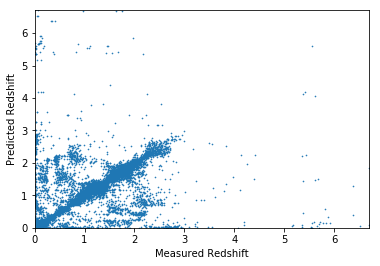

In [33]:
plt.scatter(targets, all_prd, s=0.4)
plt.xlim((0, targets.max()))
plt.ylim((0, all_prd.max()))
plt.xlabel('Measured Redshift')
plt.ylabel('Predicted Redshift')

In [34]:
Model = dtr
Model

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

tree_graph_to_png(tree=dtr, feature_names=['u - g', 'g - r', 'r - i', 'i - z'], 
                  png_file_to_save='/home/dzyga/Docs/Python/PRGs/SDSStree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0528847 to fit



In [19]:
from sklearn.tree._tree import TREE_LEAF
def prune_to_depth_auxiliary(inner_tree, max_depth, index, current_depth):
    if current_depth >= max_depth:
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    else:
        if inner_tree.children_left[index] != TREE_LEAF:
            prune_to_depth_auxiliary(inner_tree, max_depth, inner_tree.children_left[index], current_depth+1)
        if inner_tree.children_right[index] != TREE_LEAF:
            prune_to_depth_auxiliary(inner_tree, max_depth, inner_tree.children_right[index], current_depth+1)

def prune_to_depth(inner_tree, max_depth):
    prune_to_depth_auxiliary(inner_tree, max_depth, 0, 0)

In [25]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)


#tree_graph_to_png(age_tree, feature_names=['Age'], 
#                 png_file_to_save='topic_tree2.png')


In [37]:
prune_to_depth(Model.tree_, 3)

In [38]:
tree_graph_to_png(Model, feature_names=['u - g', 'g - r', 'r - i', 'i - z'], 
                 png_file_to_save='topic_tree2_cut_depth1.png')

In [39]:
dtr

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')